<h2 style="text-align: center;">Statistics & Linear Model Lab4</h2>
<h3 style="text-align: center;">Wenjie Hu</h3>
<h3 style="text-align: center;">14/1/2024</h3>

---

![ex1](./imgs/a.jpg)

$H_0 F=G$   vs   $H_1 F\ne G$   
$sort(Z=(X_1,...X_m,y_1...y_n) = (z_1...z_n)) \implies(z_1)....(z_n)$

degrees of freedom  
1. $X_1^2$
2. $X_1^2$
3. $X_2^2$
4. kolmogorov's dists

$C(\alpha)\approx {\sqrt{-\log({\alpha \over 2}){1\over 2}}}$

In [1]:
library(stats)
library(ggplot2)

In [2]:
phi_1 <- function(u) {
  return(sqrt(3) * (2 * u - 1))
}

phi_2 <- function(u) {
  return(sqrt(48) * (0.25 - abs(u - 0.5)))
}

$T_\varphi = \sqrt{mn \over N}\{ {1 \over m}\sum_{i=1}^{m}\varphi({{R_i-0.5}\over N})-{1\over n}\sum_{i=m+1}^N\varphi({R_i-0.5 \over N})
\}$

In [3]:
t_statistic <- function(m, n, phi, X, Y) {
  N <- m + n
  ranked <- rank(c(X, Y))
  ranked_X <- ranked[1:m]
  ranked_Y <- ranked[(m + 1):N]
  sum_1 <- sum(phi((ranked_X - 0.5) / N))
  sum_2 <- sum(phi((ranked_Y - 0.5) / N))
  return(sqrt((m * n) / N) * ((1 / m) * sum_1 - (1 / n) * sum_2))
}

In [4]:
ks_statistic <- function(X, Y) {
  m <- length(X)
  n <- length(Y)
  return(sqrt(m * n / (m + n)) * ks.test(X, Y)$statistic)
}


In [5]:

critical.value.ks.test <- function(n, conf, alternative = "two.sided") {	
	if(alternative == "one-sided") conf <- 1- (1-conf)*2;
		kolmogorov.pdf <- function(x) { 
			i <- 1:10^4;
			sqrt(2*pi) / x * sum(exp(-(2*i - 1)^2*pi^2/(8*x^2))) - conf;	
			}
		critical.value <- uniroot(kolmogorov.pdf , lower = 10^(-6), upper = 3)$root / sqrt(n);
	return(critical.value);
	}

## Ex.1
![ex1](./imgs/ex1.jpg)

In [21]:
m <- 20
n <- 20
W_results <- AB_results <- L_results <- KS_results <- numeric()

for (i in 1:10000) {
  X <- rnorm(m)
  Y <- rnorm(n)
  w <- t_statistic(m, n, phi_1, X, Y)
  ab <- t_statistic(m, n, phi_2, X, Y)
  ks <- ks_statistic(X, Y)

  W_results <- c(W_results, w^2)
  AB_results <- c(AB_results, ab^2)
  L_results <- c(L_results, w^2 + ab^2)
  KS_results <- c(KS_results, ks)
}

W_critical <- sort(W_results)[9500]
AB_critical <- sort(AB_results)[9500]
L_critical <- sort(L_results)[9500]
KS_critical <- sort(KS_results)[9500]


In [22]:
cat(sprintf("Chi squared with 1 df : %f\n", qchisq(0.95, 1)))
cat(sprintf("Wilcoxon: %f\n", W_critical))
cat(sprintf("Ansari-Bradley: %f\n\n", AB_critical))

cat(sprintf("Chi squared with 2 df: %f\n", qchisq(0.95, 2)))
cat(sprintf("Lapage test: %f\n\n", L_critical))

cat(sprintf("KS 0.95-quantile: %f\n", critical.value.ks.test(1,0.95)))
cat(sprintf("KS test: %f\n", KS_critical))

Chi squared with 1 df : 3.841459
Wilcoxon: 3.780750
Ansari-Bradley: 3.888000

Chi squared with 2 df: 5.991465
Lapage test: 5.940750

KS 0.95-quantile: 1.358100
KS test: 1.264911


For the first task, we generated $m=n=20$ observations from the $N(0,1)$ distribution, then we calculated the values of four different statistics as well as found the critical values of each test:  
1. the Wilcoxon test based on the statistic $W = T^2_{\phi_1}$ ,
2. the Ansari-Bradley test based on the statistic $AB = T^2{\phi_2}$,
3. the Lepage test based on the statistic $L = W + AB$,
4. the Kolmogorov-Smirnov test based on the statistic $KS$  
We repeat the experiment 10000 times and then compare the result with the theoretical values, the results are presented below:

| Statistic   | Value | Theoretical value | 
| :---------: | :---------: | :------: |
| $W$      | 3.780750      | 3.841459|
| $AB$   | 3.888000       | 3.841459|
| $L$   | 5.940750        | 5.991465|
| $KS$   | 1.264911        | 1.358100|

As we can see above, all the statistics are very close to the theoretical values, and the Ansari-Bradley test critical value is the closest to the asymptotic value.

---

## Ex.2
![ex2](./imgs/ex2.jpg)

In [13]:
run_experiment <- function(distribution,params, n, m) {
  cr_w <- qchisq(0.95, 1)
  cr_ab <- qchisq(0.95, 1)
  cr_l <- qchisq(0.95, 2)
  cr_ks <- critical.value.ks.test(1,0.95)
  
  test_statistics <- data.frame(
    scale = numeric(),
    shift = numeric(),
    W = numeric(),
    AB = numeric(),
    L = numeric(),
    KS = numeric()
  )
  
  powers <- data.frame(
    shift = numeric(),
    scale = numeric(),
    test = character(),
    power = numeric(),
    stringsAsFactors = FALSE
  )
  
  for (i in 1:length(params)) {
    x_params <- params[[i]][[1]]
    y_params <- params[[i]][[2]]
    w <- ab <- l <- ks <- numeric()
    
    for (j in 1:10000) {
      X <- distribution(m, x_params[1], x_params[2])
      Y <- distribution(m, y_params[1], y_params[2])

      w_s <- t_statistic(m, n, phi_1, X, Y)
      ab_s <- t_statistic(m, n, phi_2, X, Y)
      
      w <- c(w, w_s^2)
      ab <- c(ab, ab_s^2)
      l <- c(l, w_s^2 + ab_s^2)
      ks <- c(ks, ks_statistic(X, Y))
    }
    
  powers <- rbind(
    powers,
    data.frame(shift = y_params[1], scale = y_params[2], test = 'W', power = sum(w > cr_w) / length(w)),
    data.frame(shift = y_params[1], scale = y_params[2], test = 'AB', power = sum(ab > cr_ab) / length(ab)),
    data.frame(shift = y_params[1], scale = y_params[2], test = 'L', power = sum(l > cr_l) / length(l)),
    data.frame(shift = y_params[1], scale = y_params[2], test = 'KS', power = sum(ks > cr_ks) / length(ks))
  )
  
  test_statistics <- rbind(
      test_statistics,
      c(y_params[1], y_params[2], ks[1], ab[1], l[1], ks[1])
    )
  }
  
  colnames(test_statistics) <- c('shift', 'scale', 'W', 'AB', 'L', 'KS')
  colnames(powers) <- c('shift', 'scale', 'test', 'power')
  
  return(list(test_statistics, powers))
}

In [6]:
params_ex2 <- list(
  list(c(0, 1), c(0.2, 1.0)),
  list(c(0, 1), c(0.4, 1.0)),
  list(c(0, 1), c(0.6, 1.0)),
  list(c(0, 1), c(0.8, 1.0)),
  list(c(0, 1), c(1.0, 1.0)),
  list(c(0, 1), c(1.2, 1.0)),
  list(c(0, 1), c(1.4, 1.0))
)

#### (a) Normal distribution with the respective shift and scale parameters

In [8]:
result <- run_experiment(
  rnorm,
  params = params_ex2,
  n = 20,
  m = 20
)

t_stat_normal <- result[[1]]
powers_normal <- result[[2]]

#### (b) a logistic distribution with the respective shift and scale parameters

In [9]:
result <- run_experiment(
  rlogis,
  params = params_ex2,
  n = 20,
  m = 20
)

t_stat_logistic <- result[[1]]
powers_logistic <- result[[2]]


#### (c) a Cauchy distribution with the respective shift and scale parameters

In [10]:
result <- run_experiment(
  rcauchy,
  params = params_ex2,
  n = 20,
  m = 20
)
t_stat_cauchy <- result[[1]]
powers_cauchy <- result[[2]]

In [7]:
plot_powers_shift <- function(powers,plot_title) {
  options(repr.plot.width=8, repr.plot.height=8)
  ggplot(powers, aes(x = shift, y = power, color = test)) +
    geom_line() +
    geom_point() +
    labs(title = plot_title,
         x = "Shift",
         y = "Power") +
    theme_minimal()
}

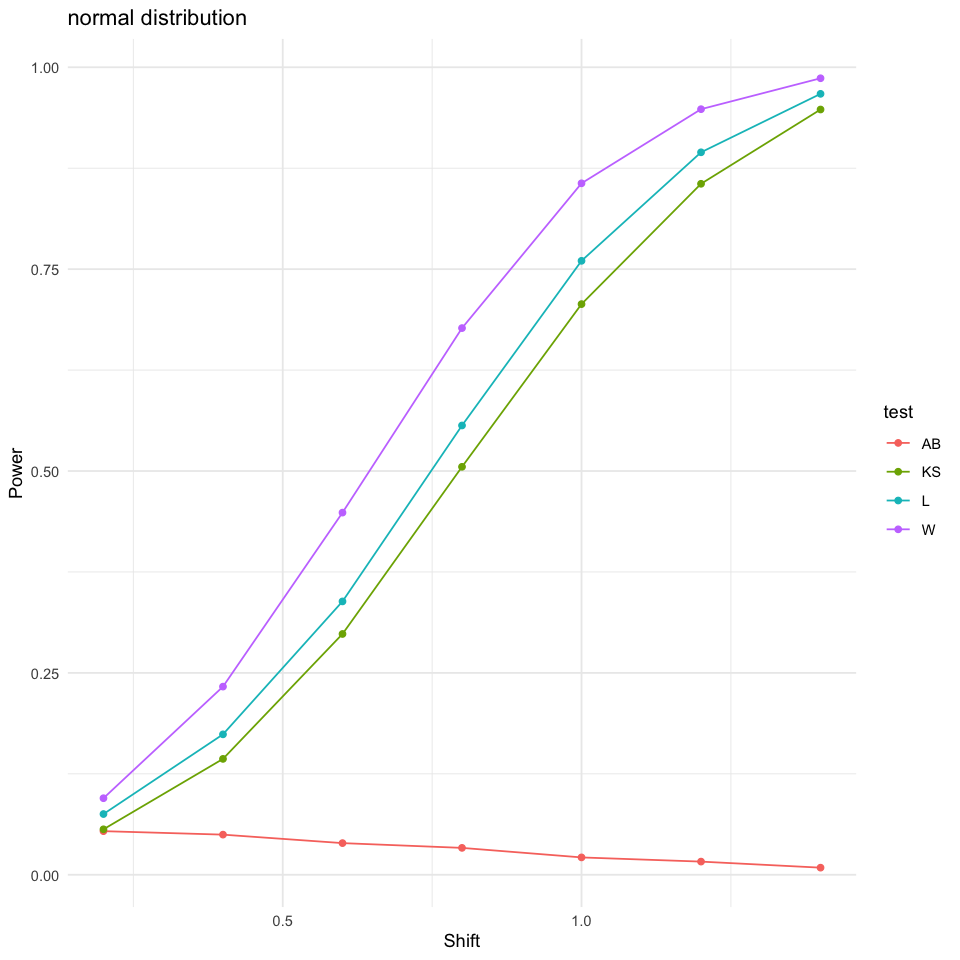

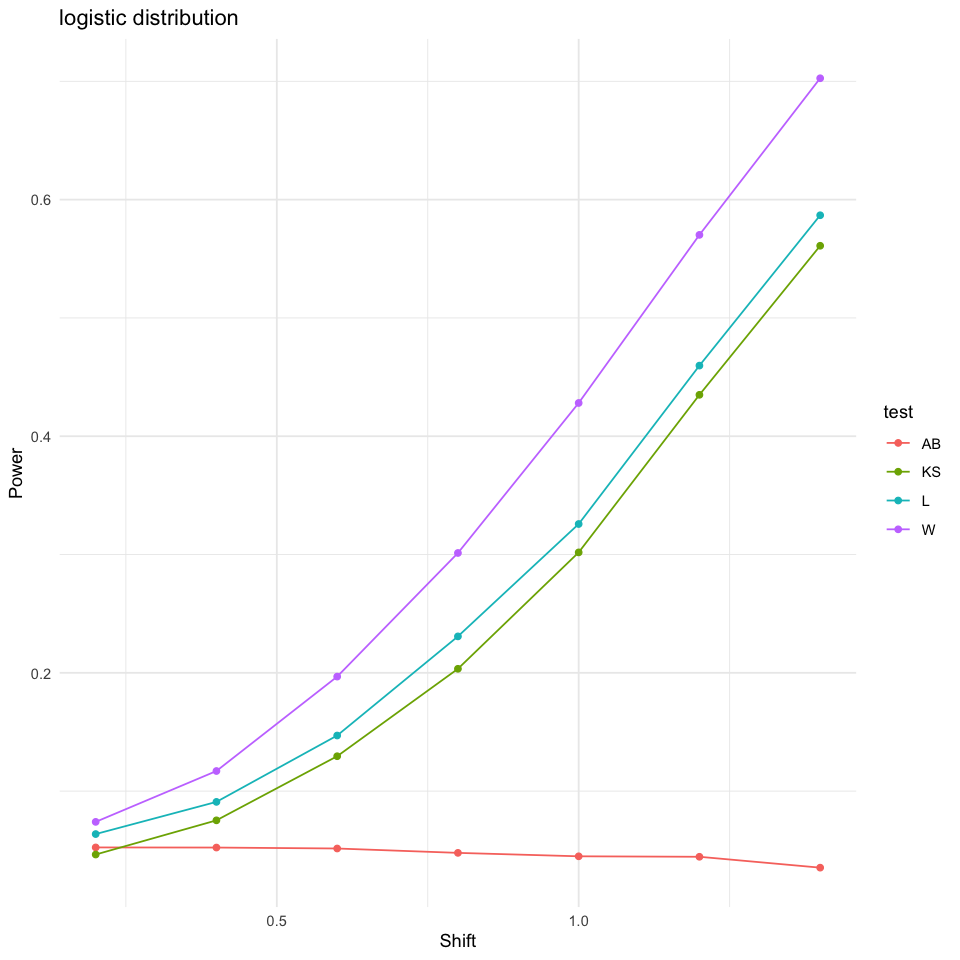

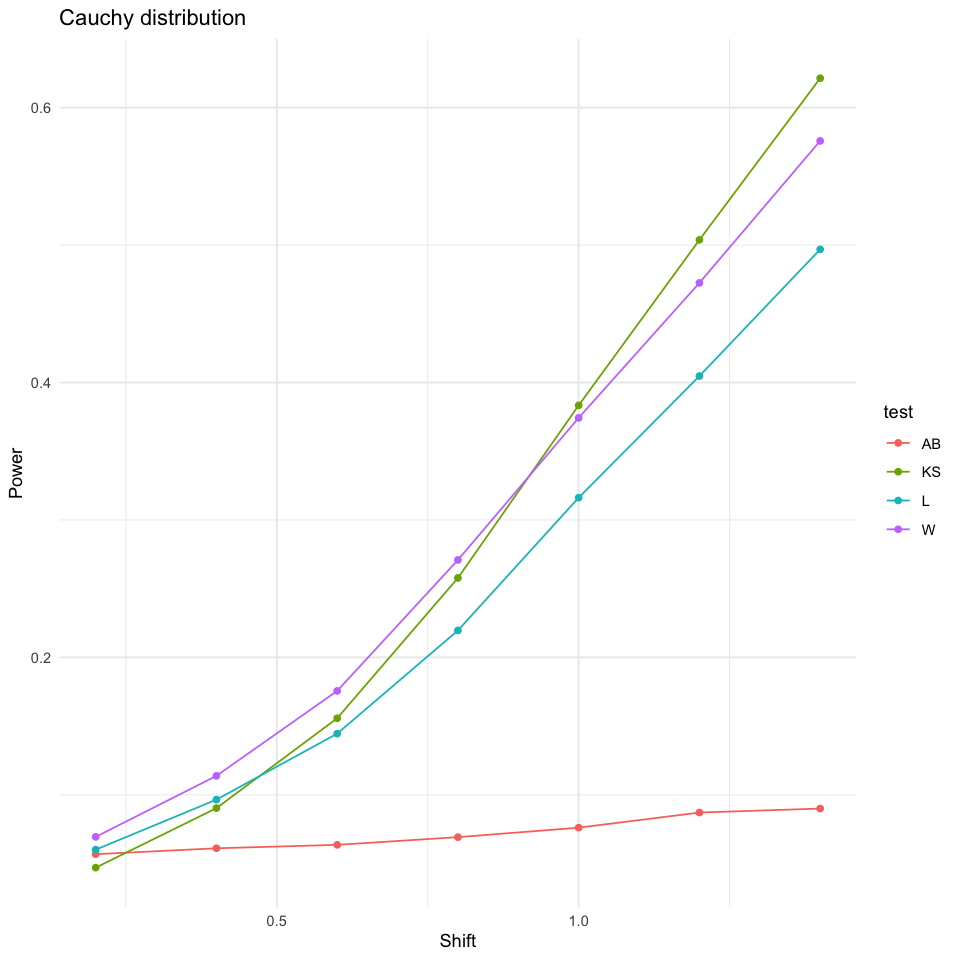

In [23]:
plot_powers_shift(powers_normal, "normal distribution")
plot_powers_shift(powers_logistic, "logistic distribution")
plot_powers_shift(powers_cauchy, "Cauchy distribution")


In this task we are asked to generate $m=n=20$ observations from the normal, logistic and Cauchy distribution with different shift parameter $\mu_2$ where $\sigma_1=1, \sigma_2=1$ and $\mu_1=0$. We repeate the experiment 10000 times as usual, calculate the statistics' values and estimate the values of the power functions of the tests under consideration, the power graph is shown above.
We can easily observe that the $AB$ test has the smallest power, and it doesn't change with the shift parameter $\mu_2$, however all other tests increase with shift. It is worth noting that on the normal distribution, the power of $W$, $L$, $KS$ tests are almost converge to 1 when the shift parameter increases. The power function of $W$ performs better on logistic distribution than on Cauchy distribution, and the opposite is true for $KS$.

---

## Ex3.
![ex3](./imgs/ex3.jpg)


#### (a) a normal distribution with the respective shift and scale parameters

In [8]:
params_ex3 <- list(
  list(c(0, 1), c(0, 1.0)),
  list(c(0, 1), c(0, 1.5)),
  list(c(0, 1), c(0, 2.0)),
  list(c(0, 1), c(0, 2.5)),
  list(c(0, 1), c(0, 3.0)),
  list(c(0, 1), c(0, 3.5)),
  list(c(0, 1), c(0, 4.0))
)

In [37]:
result <- run_experiment(
  rnorm,
  params = params_ex3,
  n = 20,
  m = 20
)

t_stat_normal <- result[[1]]
powers_normal <- result[[2]]

#### (b) a logistic distribution with the respective shift and scale parameters

In [38]:
result <- run_experiment(
  rlogis,
  params = params_ex3,
  n = 20,
  m = 20
)

t_stat_logistic <- result[[1]]
powers_logistic <- result[[2]]

#### (c) a Cauchy distribution with the respective shift and scale parameters

In [39]:
result <- run_experiment(
  rcauchy,
  params = params_ex3,
  n = 20,
  m = 20
)

t_stat_cauchy <- result[[1]]
powers_cauchy <- result[[2]]

In [9]:
plot_powers_scale <- function(powers,plot_title) {
  options(repr.plot.width=8, repr.plot.height=8)
  ggplot(powers, aes(x = scale, y = power, color = test)) +
    geom_line() +
    geom_point() +
    labs(title = plot_title,
         x = "Scale",
         y = "Power") +
    theme_minimal()
}

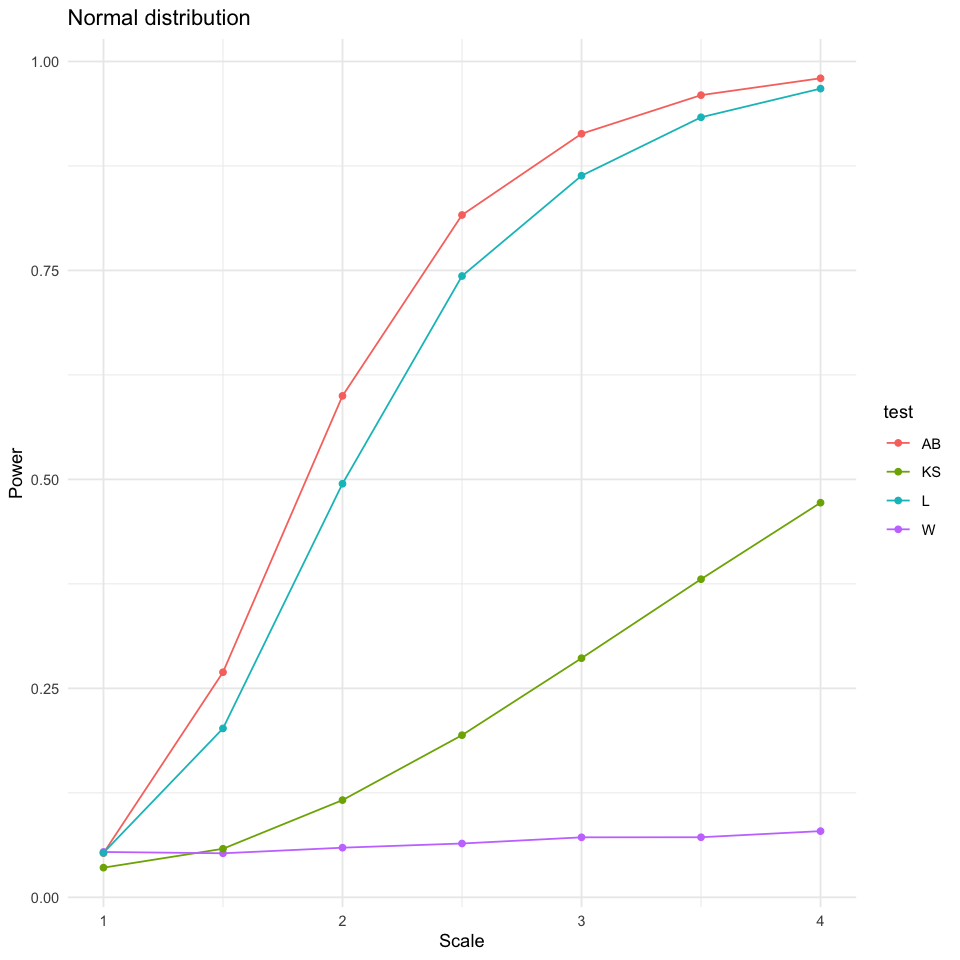

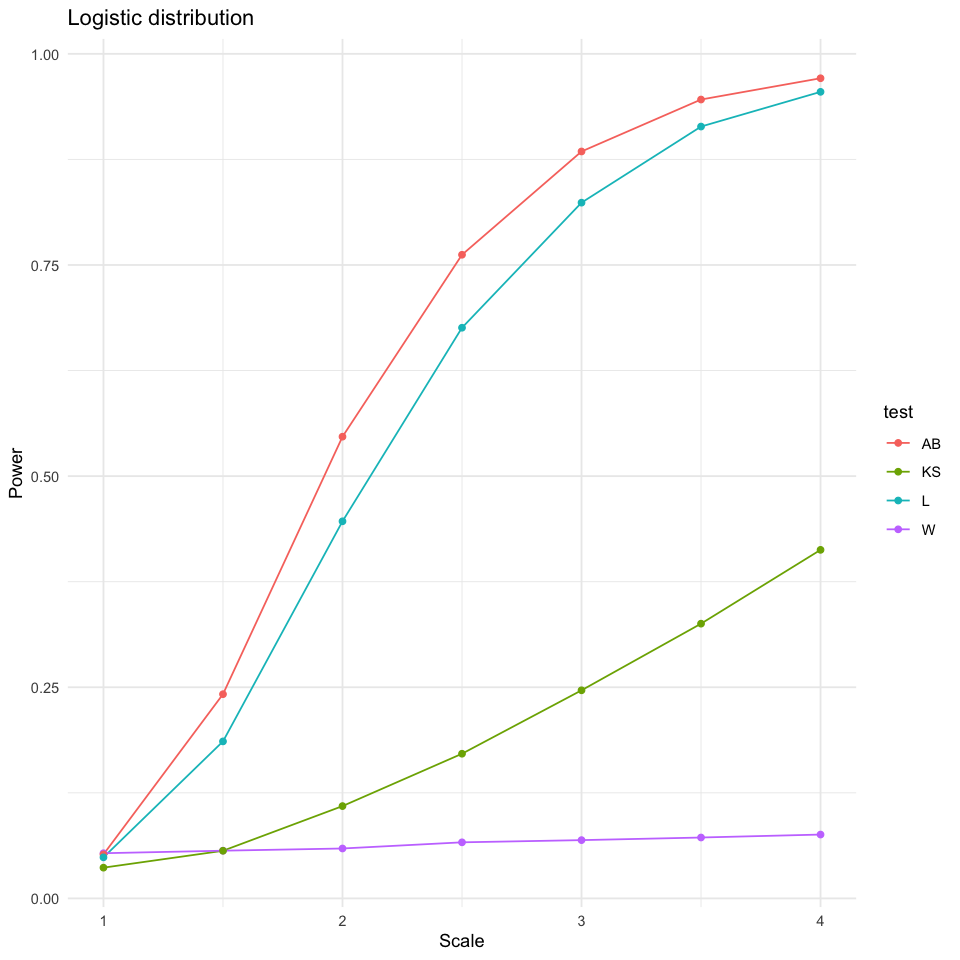

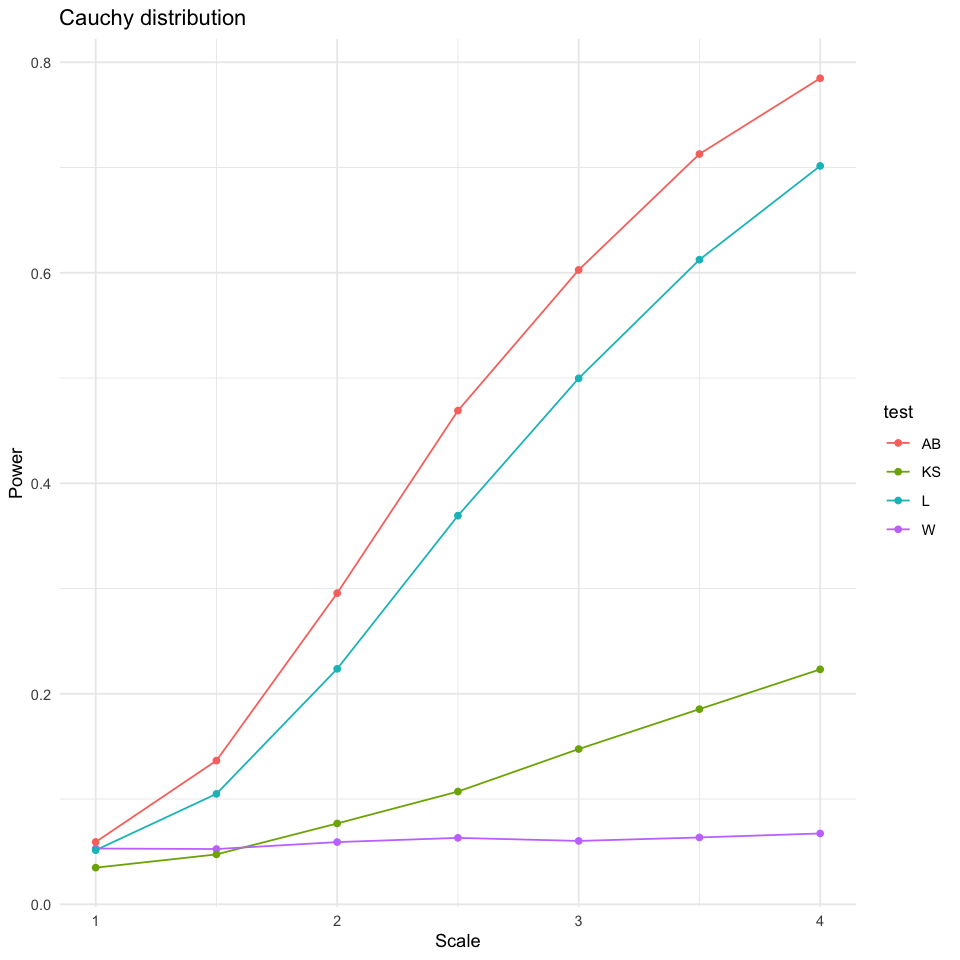

In [41]:
plot_powers_scale(powers_normal, "Normal distribution")
plot_powers_scale(powers_logistic, "Logistic distribution")
plot_powers_scale(powers_cauchy, "Cauchy distribution")

Where $\mu_1=0, \sigma_1=1$ but we changed the scale parameter $\sigma_2$ instead of shift $\mu_2$, the experiment's results greatly changed.  
The $W$ test performs poorly and it doesn't grow with scale as we can see from the above graphs, as well as fthe $KS$ test doesn't yield high power but it increases slightly with the scale. $L$ and $AB$ tests performs the best with power close to 1 on normal distribution and logistic distribution when the scale parameter $\sigma_2$ increases. The situation on Cauchy distribution is similar to normal and logistic distribution but with less power.

---

## Ex4.
![ex4](./imgs/ex4.jpg)


#### (a) a normal distribution with the respective shift and scale parameters

In [10]:
params_ex4 <- list(
  list(c(0, 1), c(0.2, 1.0)),
  list(c(0, 1), c(0.4, 1.5)),
  list(c(0, 1), c(0.6, 2.0)),
  list(c(0, 1), c(0.8, 2.5)),
  list(c(0, 1), c(1.0, 3.0)),
  list(c(0, 1), c(1.2, 3.5)),
  list(c(0, 1), c(1.4, 4.0))
)

In [42]:
result <- run_experiment(
  rnorm,
  params = params_ex4,
  n = 20,
  m = 20
)

t_stat_rnorm <- result[[1]]
powers_rnorm <- result[[2]]

#### (b) a logistic distribution with the respective shift and scale parameters

In [43]:
result <- run_experiment(
  rlogis,
  params = params_ex4,
  n = 20,
  m = 20
)

t_stat_logistic <- result[[1]]
powers_logistic <- result[[2]]

#### (c) a Cauchy distribution with the respective shift and scale parameters

In [44]:
result <- run_experiment(
  rcauchy,
  params = params_ex4,
  n = 20,
  m = 20
)

t_stat_cauchy <- result[[1]]
powers_cauchy <- result[[2]]

In [11]:
plot_powers_cases <- function(powers, plot_title) {
  options(repr.plot.width=8, repr.plot.height=8)
  powers$test <- factor(powers$test, levels = c('W', 'AB', 'L', 'KS'))
  powers$cases <- rep(1:7, each = 4)
  ggplot(powers, aes(x = cases, y = power, color = test)) +
    geom_line() +
    geom_point() +
    labs(title = plot_title,
        x = "Cases", y = "Power") +
    theme_minimal()

}

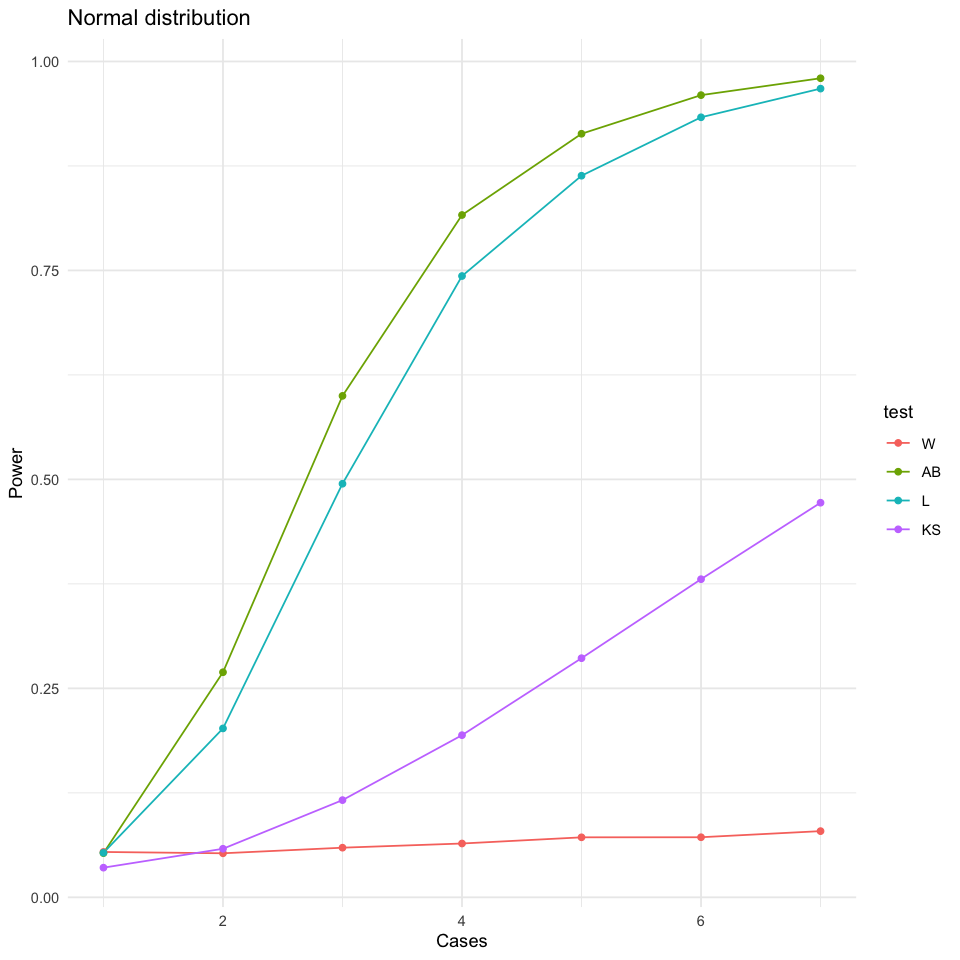

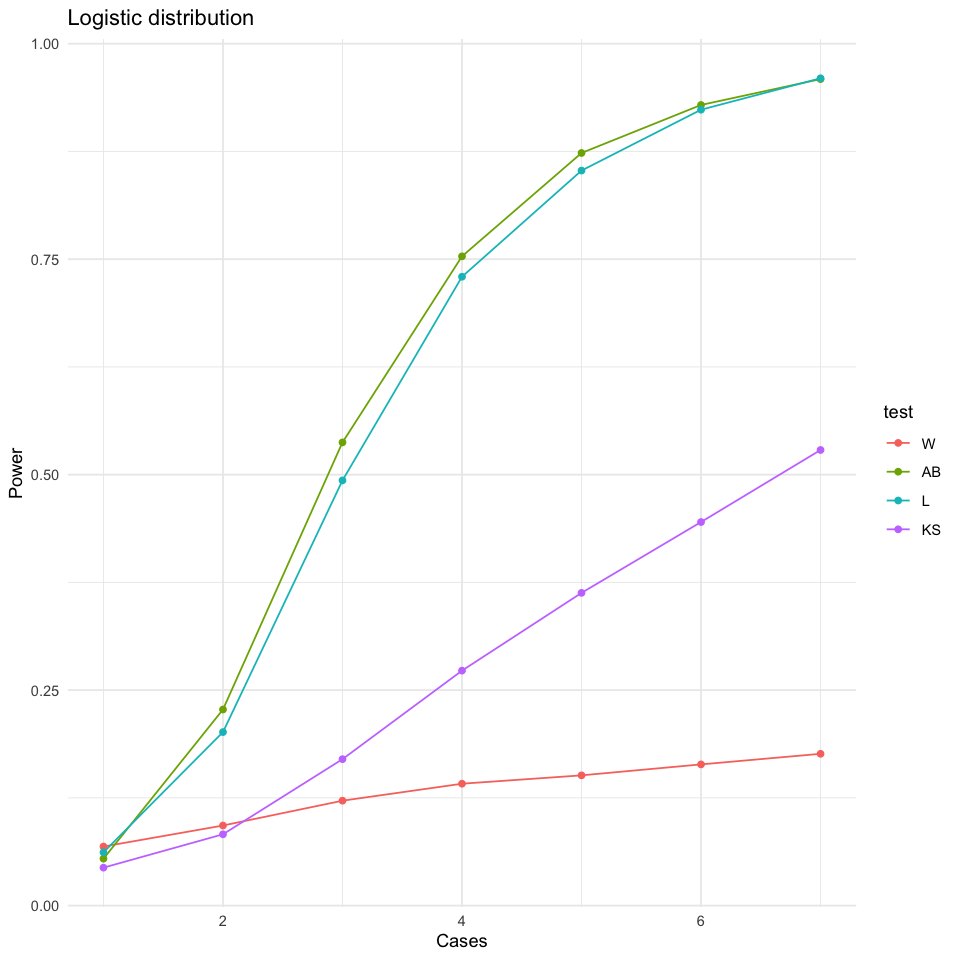

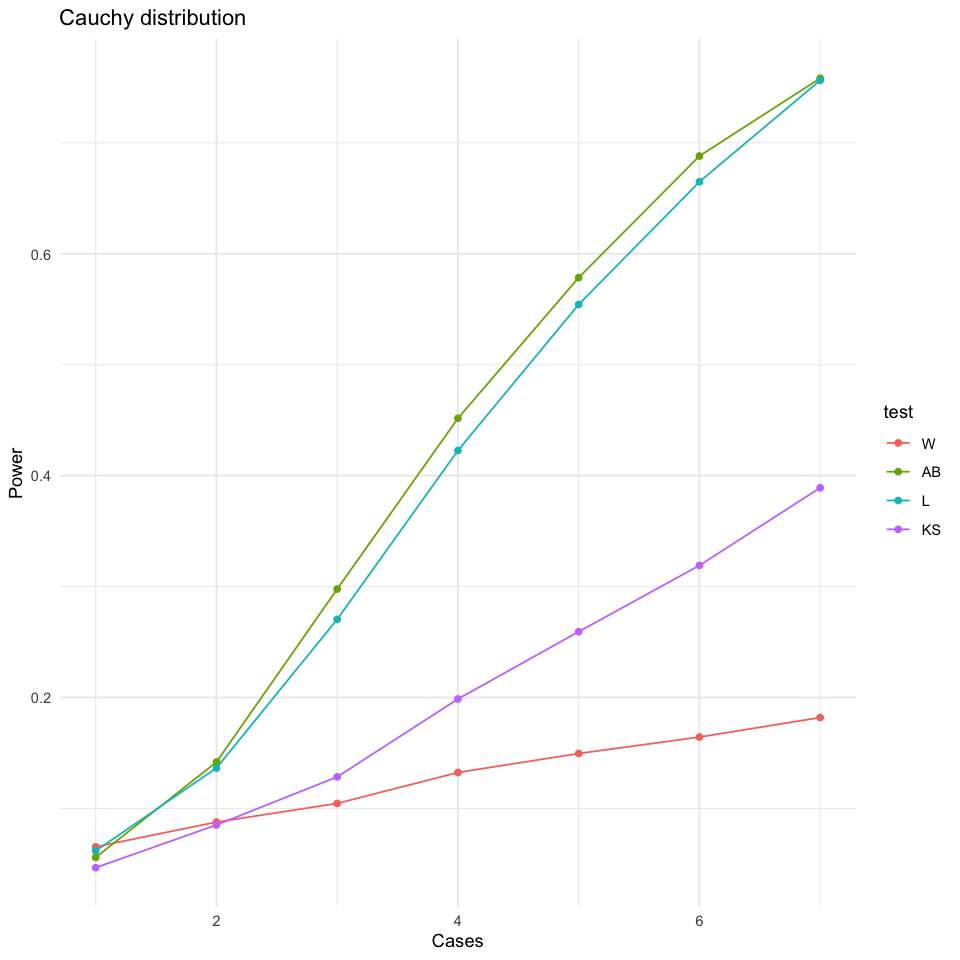

In [46]:
plot_powers_cases(powers_normal, "Normal distribution")
plot_powers_cases(powers_logistic, "Logistic distribution")
plot_powers_cases(powers_cauchy, "Cauchy distribution")

For exercise 4, we change both shift and scale parameters $\mu_2$ and $\sigma_2$, then estimate the power functions' value on different tests, the results we presented above. Since we changed both the shift and scale parameters, we changed the X-axis to Cases to represent seven different combinations of parameters. In this case, the results are very similar, $L$ and $AB$ tests still perform well, they almost convert to the power equal to 1, and the $W$ test is still the worst, but better than before. 

---

## Ex5.
![ex5](./imgs/ex5.jpg)


In [27]:
m <- 50
n <- 50
W_results <- AB_results <- L_results <- KS_results <- numeric()

for (i in 1:10000) {
  X <- runif(m)
  Y <- runif(n)
  w <- t_statistic(m, n, phi_1, X, Y)
  ab <- t_statistic(m, n, phi_2, X, Y)
  ks <- ks_statistic(X, Y)

  W_results <- c(W_results, w^2)
  AB_results <- c(AB_results, ab^2)
  L_results <- c(L_results, w^2 + ab^2)
  KS_results <- c(KS_results, ks)
}

W_critical <- sort(W_results)[9500]
AB_critical <- sort(AB_results)[9500]
L_critical <- sort(L_results)[9500]
KS_critical <- sort(KS_results)[9500]


In [28]:
cat(sprintf("Chi squared with 1 df : %f\n", qchisq(0.95, 1)))
cat(sprintf("Wilcoxon: %f\n", W_critical))
cat(sprintf("Ansari-Bradley: %f\n\n", AB_critical))

cat(sprintf("Chi squared with 2 df: %f\n", qchisq(0.95, 2)))
cat(sprintf("Lapage test: %f\n\n", L_critical))

cat(sprintf("KS 0.95-quantile: %f\n", critical.value.ks.test(1,0.95)))
cat(sprintf("KS test: %f\n", KS_critical))

Chi squared with 1 df : 3.841459
Wilcoxon: 3.926208
Ansari-Bradley: 3.817152

Chi squared with 2 df: 5.991465
Lapage test: 5.887920

KS 0.95-quantile: 1.358100
KS test: 1.300000


In the fifth task, we repeat the same experiment as exercise 1 but we increase the size of the dataset that $m=n=50$ observations from the $U(0,1)$ distribution, then we calculate the values of the statistics $W, AB, L, KS$ and find the critical value of each test, we repeate the experiment 10000 times and compare the result with the theoretical values.  
| Statistic   | Value | Theoretical value | 
| :---------: | :---------: | :------: |
| $W$      | 3.926208      | 3.841459|
| $AB$   |  3.817152       | 3.841459|
| $L$   | 5.887920        | 5.991465|
| $KS$   | 1.300000        | 1.358100|  

as the result in exercise 1, the estimated values are very close to the theoretical values, especially the Lepage test outperforms the other tests. It can be seen that increasing the size and changing from a normal distribution to a uniform distribution will not change the results much.

---

## Ex6.
![ex6](./imgs/ex6.jpg)


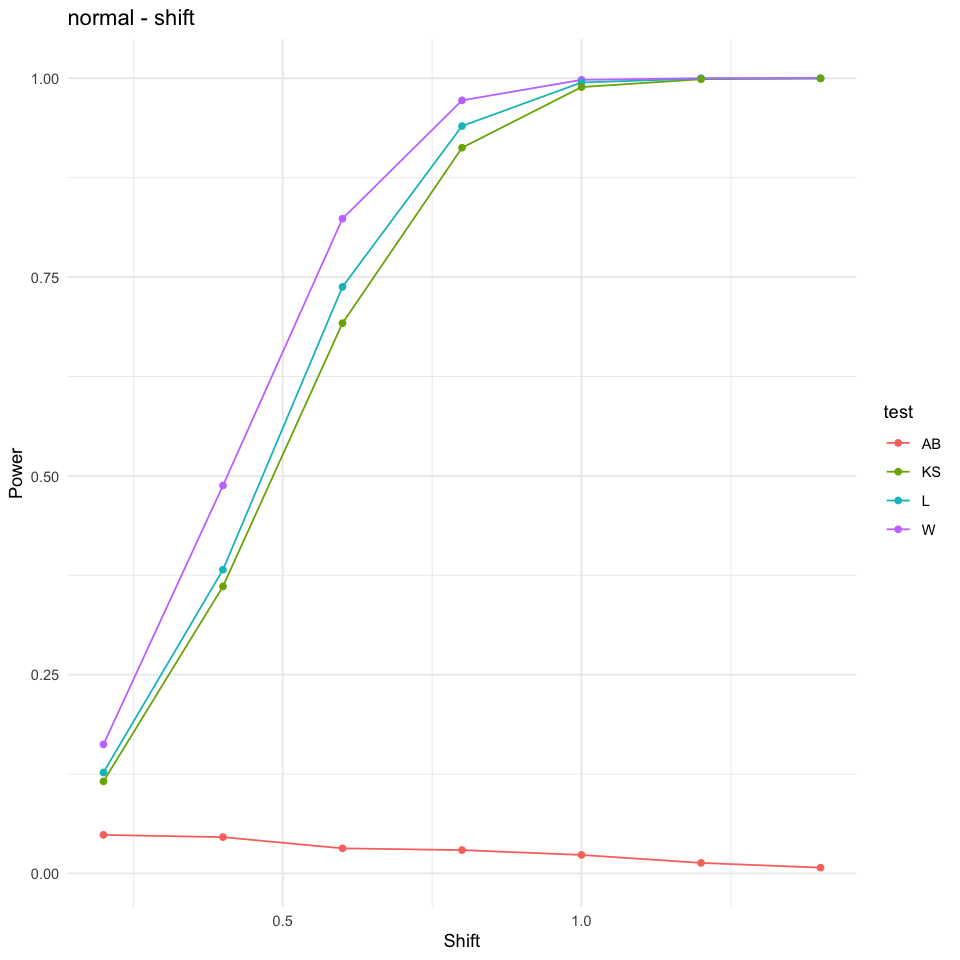

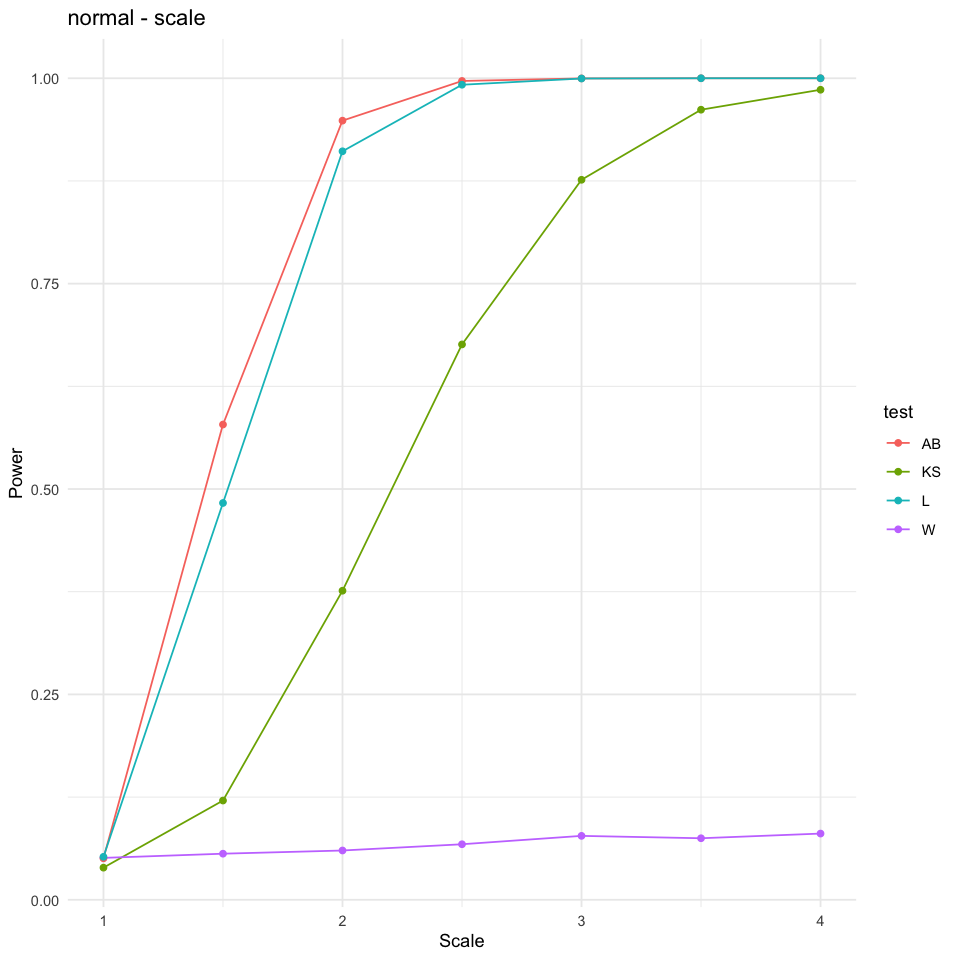

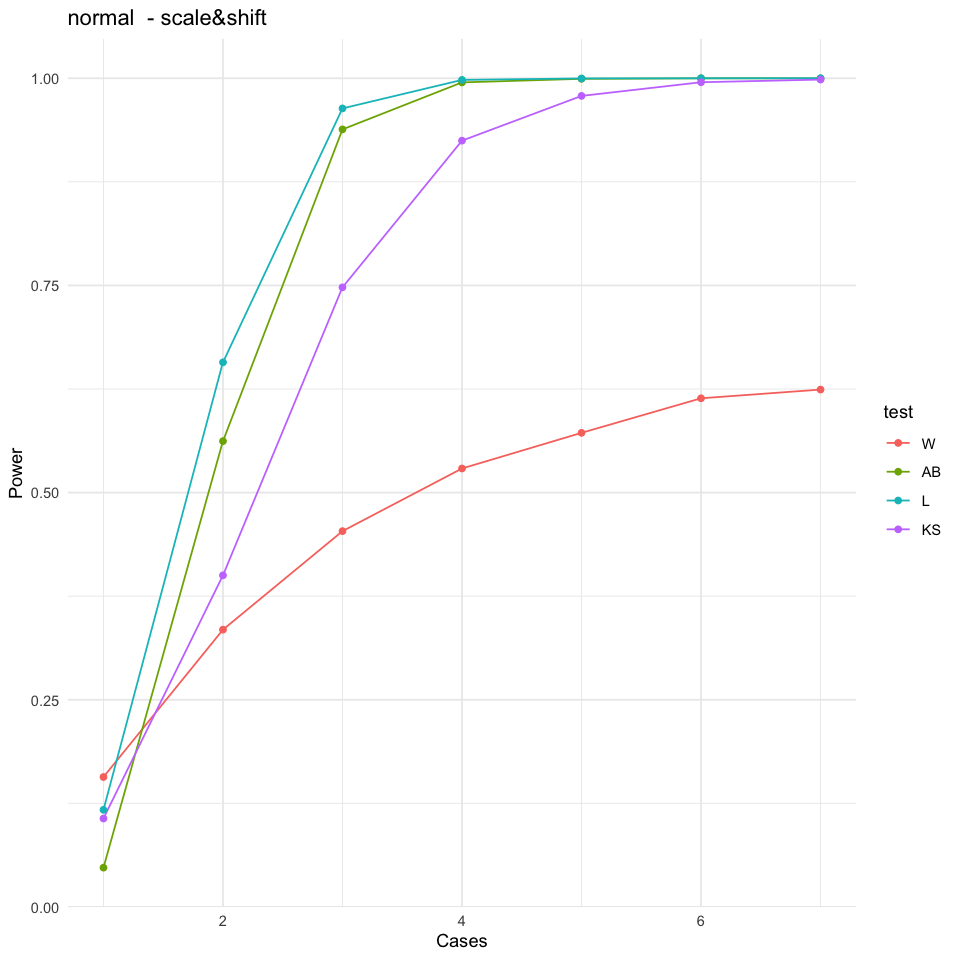

In [49]:
result_norm_shift <- run_experiment(rnorm, params = params_ex2, n = 50, m = 50)
result_norm_scale <- run_experiment(rnorm, params = params_ex3, n = 50, m = 50)
result_norm_shift_scale <- run_experiment(rnorm, params = params_ex4, n = 50, m = 50)

plot_powers_shift(result_norm_shift[[2]], "normal - shift")
plot_powers_scale(result_norm_scale[[2]], "normal - scale")
plot_powers_cases(result_norm_shift_scale[[2]], "normal  - scale&shift")

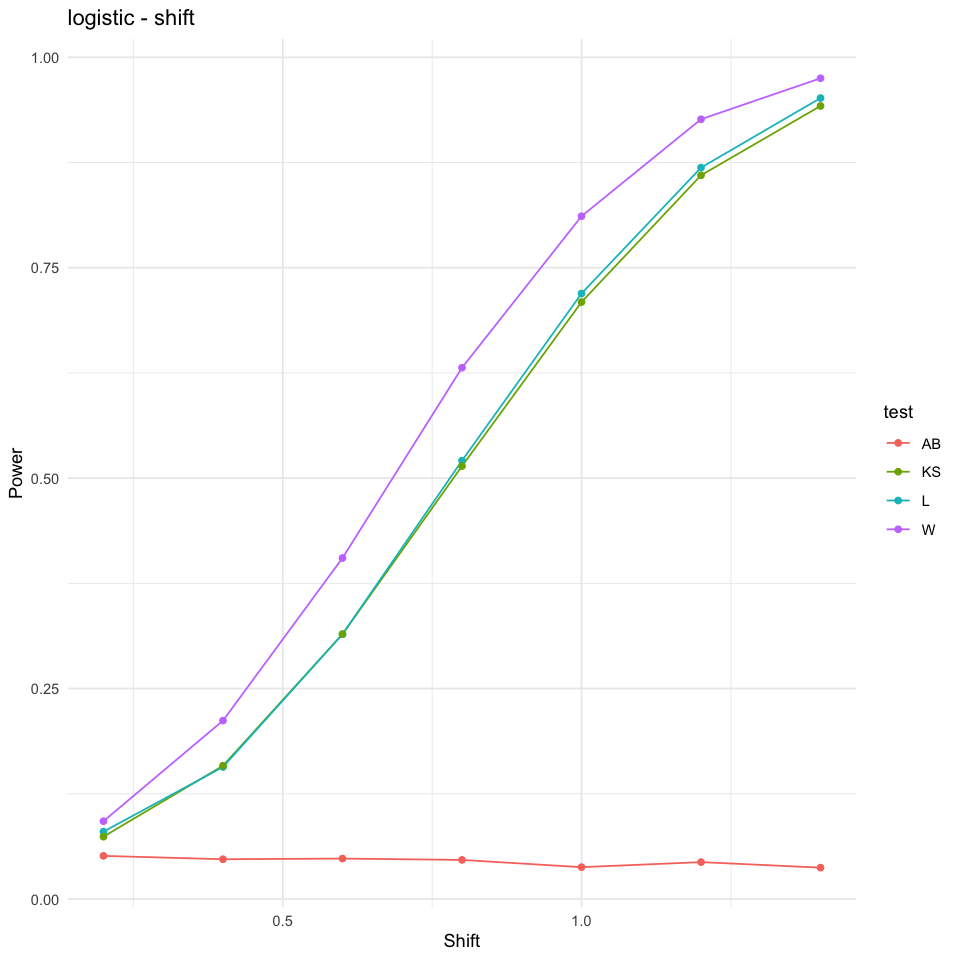

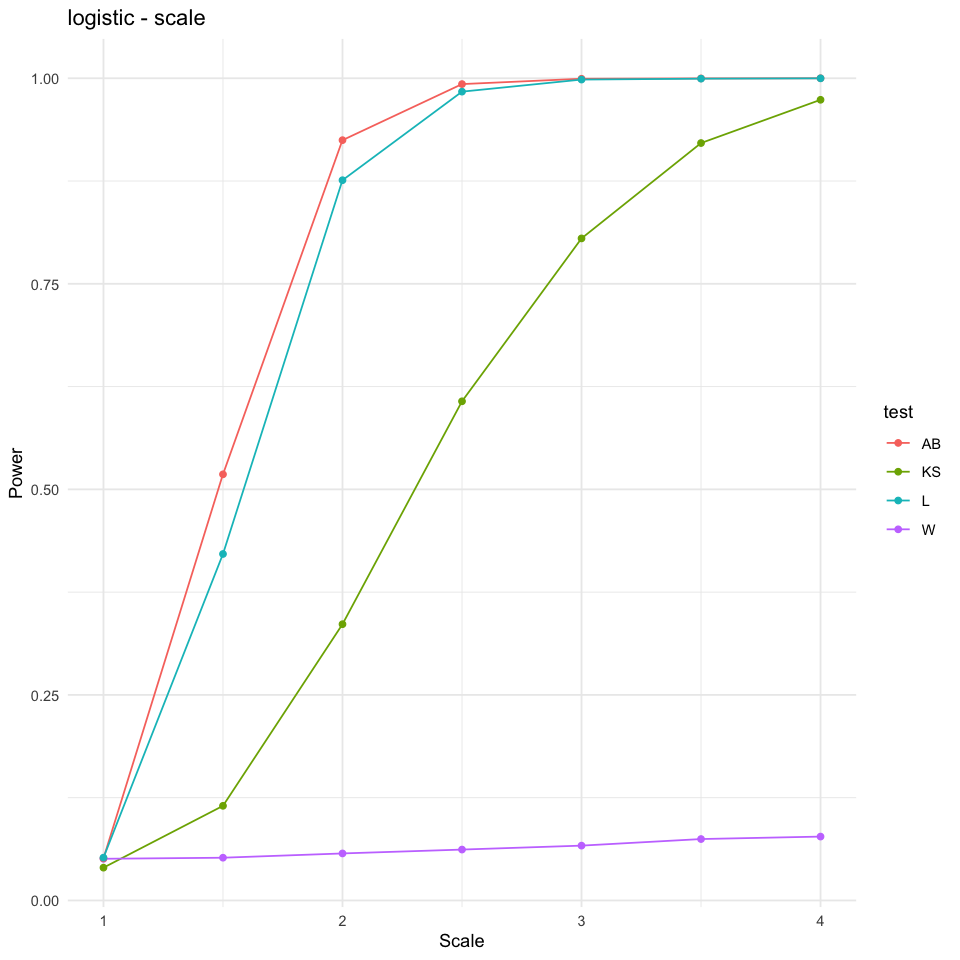

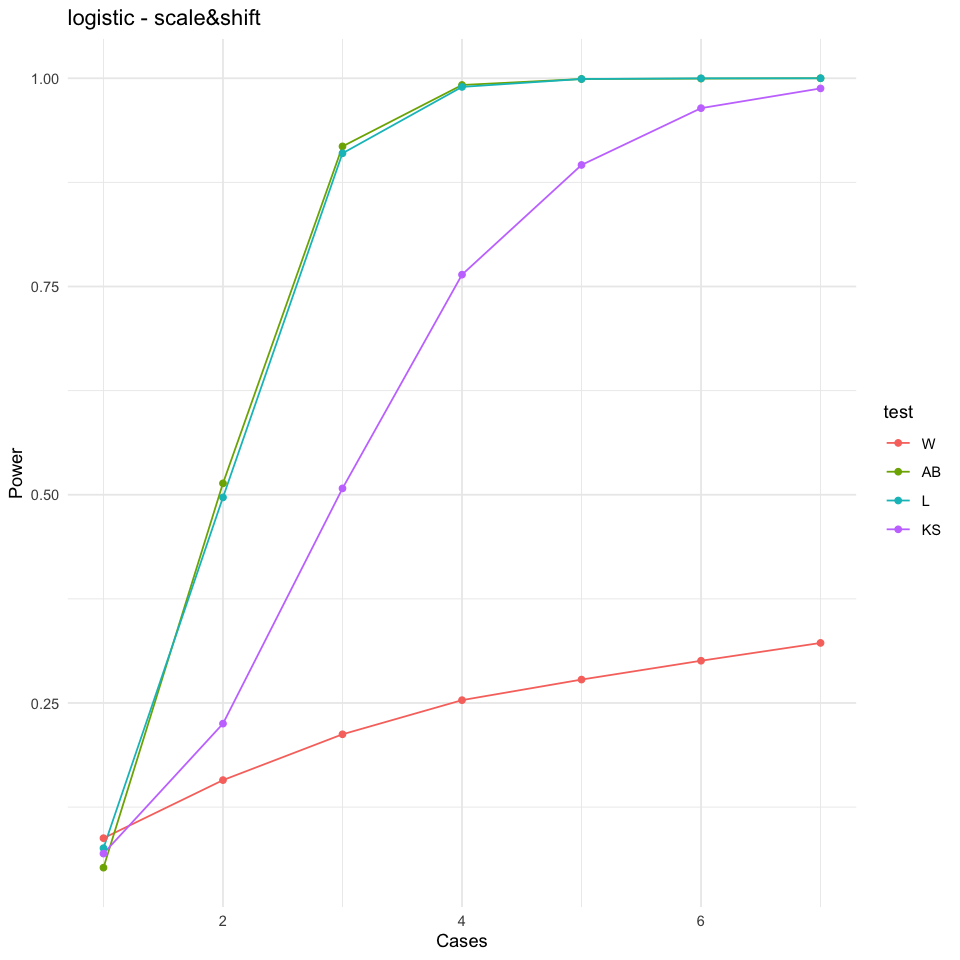

In [50]:
result_rlogis_shift <- run_experiment(rlogis, params = params_ex2, n = 50, m = 50)
result_rlogis_scale <- run_experiment(rlogis, params = params_ex3, n = 50, m = 50)
result_rlogis_shift_scale <- run_experiment(rlogis, params = params_ex4, n = 50, m = 50)

plot_powers_shift(result_rlogis_shift[[2]], "logistic - shift")
plot_powers_scale(result_rlogis_scale[[2]], "logistic - scale")
plot_powers_cases(result_rlogis_shift_scale[[2]], "logistic - scale&shift")

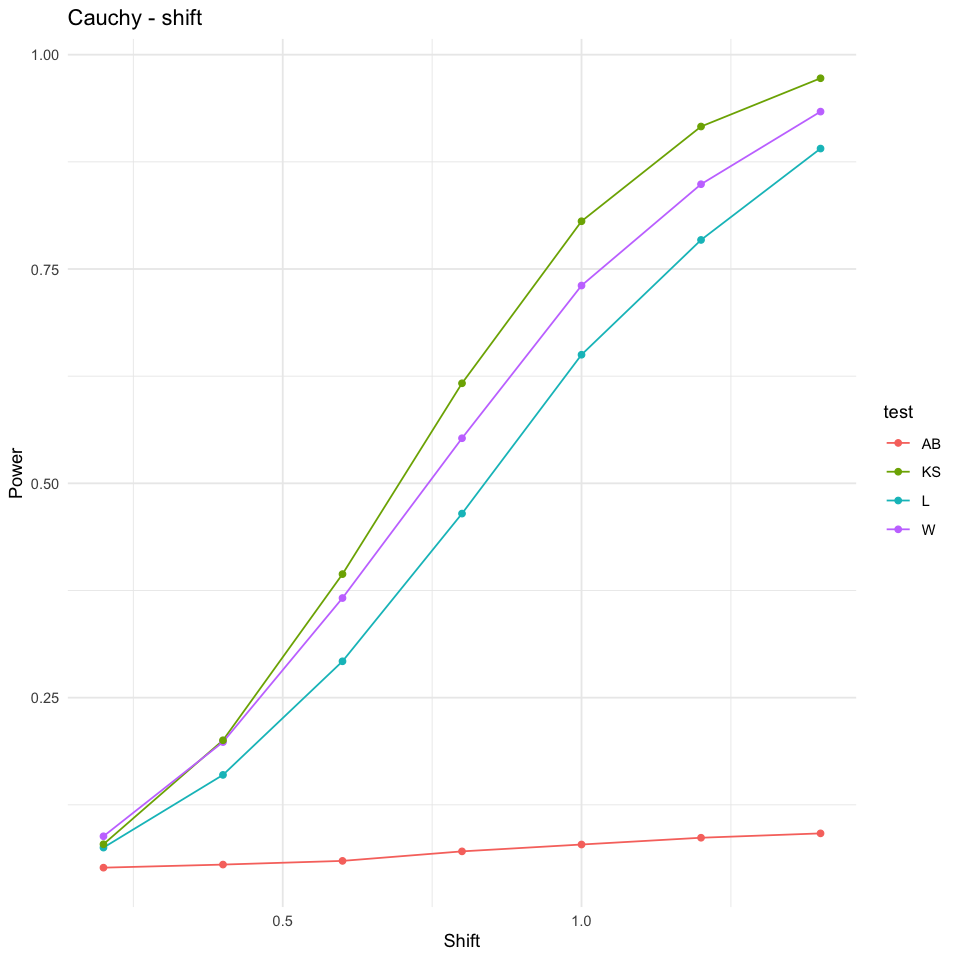

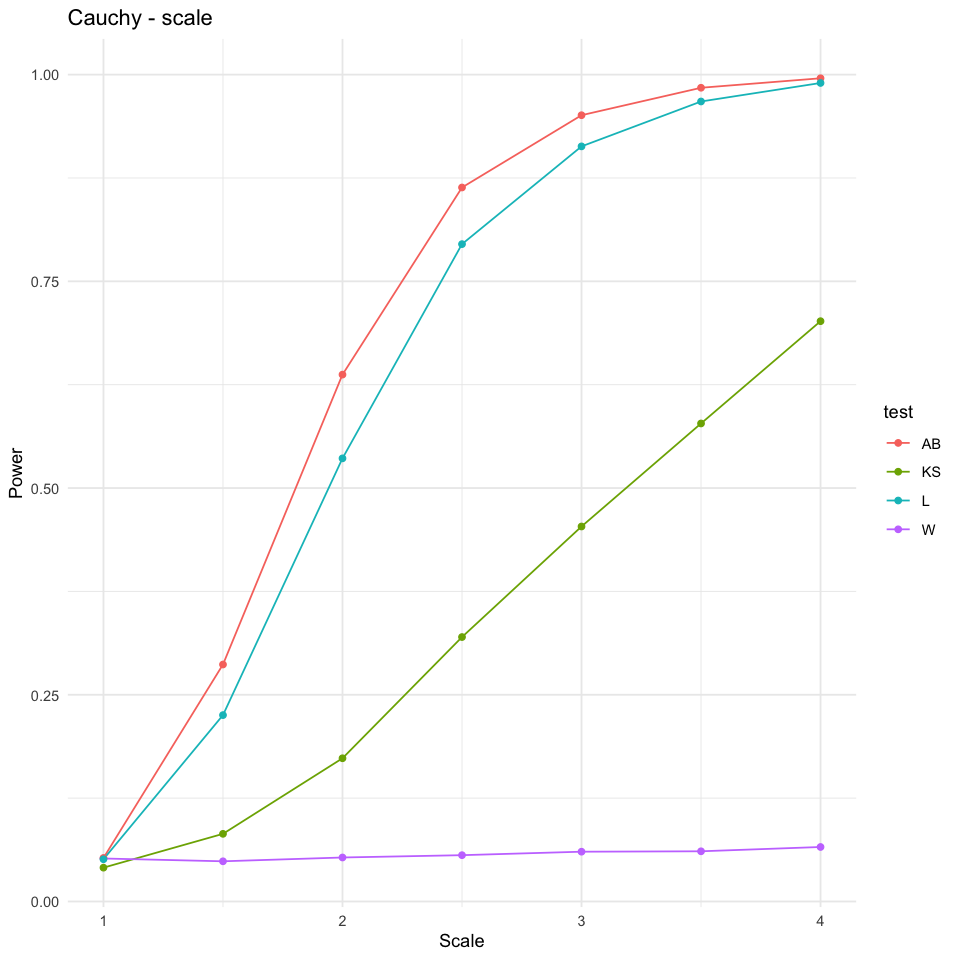

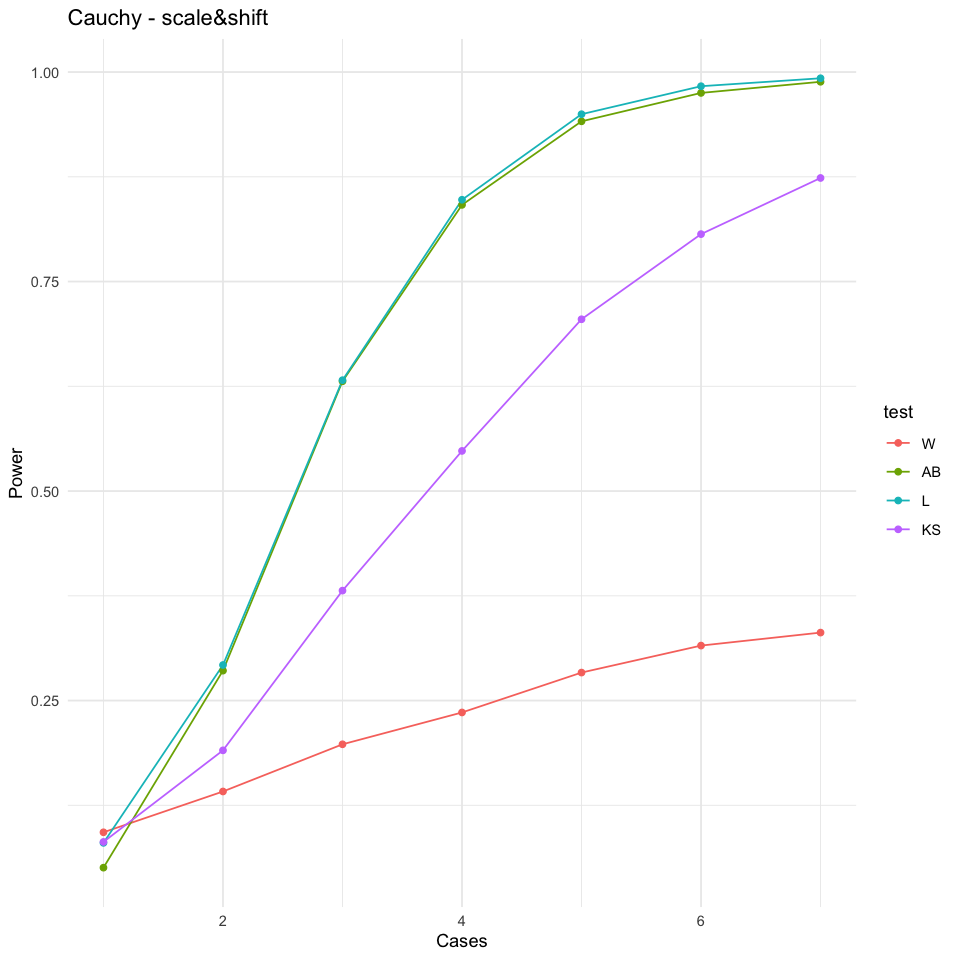

In [14]:
result_cauchy_shift <- run_experiment(rcauchy, params = params_ex2, n = 50, m = 50)
result_cauchy_scale <- run_experiment(rcauchy, params = params_ex3, n = 50, m = 50)
result_cauchy_shift_scale <- run_experiment(rcauchy, params = params_ex4, n = 50, m = 50)

plot_powers_shift(result_cauchy_shift[[2]], "Cauchy - shift")
plot_powers_scale(result_cauchy_scale[[2]], "Cauchy - scale")
plot_powers_cases(result_cauchy_shift_scale[[2]], "Cauchy - scale&shift")

In the last task, we repeat the same experiment as exercises 2,3 and 4, but we generate $n=50$ observations. The results are presented above.  
When we compare the results with those generated in exercises 2,3 and 4, the statistics didn't change that much, as well as the power functions. The ones that were performing poorly still performed poorly, and the ones converging to power close to 1 still reached to 1. The one exception is that $KS$ performs much better than previous experiments, and in most cases it is able to get close to 1. One more thing that we can notice is that the speed of growth of each power function much increased, in anther word, they were growing faster than before.